## Preprocessing

In [120]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [121]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [122]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [123]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [124]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [125]:
# Look at CLASSIFICATION value counts
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.head(20)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: count, dtype: int64

In [126]:
# Look at CLASSIFICATION value counts where count is greater than 1
classification_counts_greater_than_one = classification_counts[classification_counts > 1]
classification_counts_greater_than_one


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [127]:
# Choose a cutoff value
cutoff_value = 800

# Create a list of classifications to be replaced
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in the dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

    # Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [128]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [129]:
# Split our preprocessed data into our features and target arrays

X = application_df.drop(columns=['IS_SUCCESSFUL'])
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [130]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [131]:
# Define the model
nn = tf.keras.models.Sequential()

# Define the number of input features
number_input_features = len(X_train_scaled[0])

# Define the number of nodes for each hidden layer
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


/Users/kd17/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 9)              │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 18)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595 (2.32 KB)

 Trainable params: 595 (2.32 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [133]:
# Convert y_train variable into a numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [134]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.6551 - loss: 0.6390
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7242 - loss: 0.5641
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7279 - loss: 0.5587
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7299 - loss: 0.5547
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7285 - loss: 0.5545
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7280 - loss: 0.5549
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7337 - loss: 0.5508
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7308 - loss: 0.5520
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.7329 - loss: 0.5498
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.7330 - loss: 0.5493
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.7303 - loss: 0.5506
Epoch 12/100
804/80

In [135]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 471us/step - accuracy: 0.7238 - loss: 0.5578
Loss: 0.5577526092529297, Accuracy: 0.7238484025001526


<Axes: >

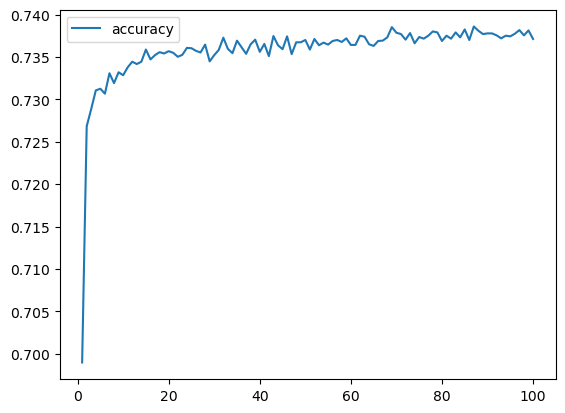

In [136]:
# Plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [137]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity_Optimization.h5')

In [138]:
# Define input layer
inputs = Input(shape=(number_input_features,))

# Define hidden layers
hidden1 = Dense(units=128, activation='relu')(inputs)
dropout1 = Dropout(0.5)(hidden1)  # Dropout layer for regularization

hidden2 = Dense(units=64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(hidden2)  # Dropout layer for regularization

hidden3 = Dense(units=32, activation='relu')(dropout2)

# Define output layer
outputs = Dense(units=1, activation='sigmoid')(hidden3)

# Define the model
nn = Model(inputs=inputs, outputs=outputs)

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
nn.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 43)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,001 (62.50 KB)

 Trainable params: 16,001 (62.50 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [140]:
# Converting y_train variable into numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [141]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.6473 - loss: 0.6463
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7171 - loss: 0.5801
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7222 - loss: 0.5754
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7254 - loss: 0.5676
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.7247 - loss: 0.5689
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7270 - loss: 0.5622
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.7338 - loss: 0.5560
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.7263 - loss: 0.5607
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.7355 - loss: 0.5537
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7326 - loss: 0.5561
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.7306 - loss: 0.5571
Epoch 12/100
804/80

In [142]:
# Evaluate model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 540us/step - accuracy: 0.7234 - loss: 0.5540
Loss: 0.5540303587913513, Accuracy: 0.7233819365501404


<Axes: >

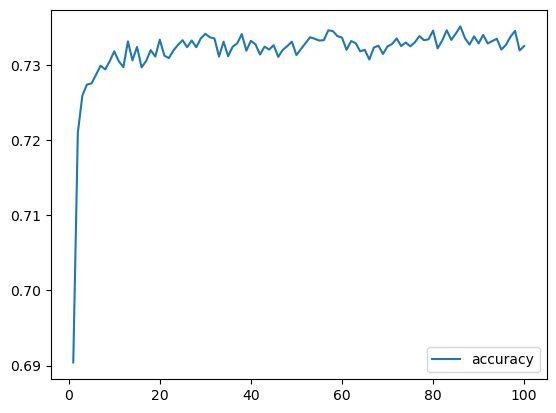

In [143]:
# Plotting accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [144]:
# Export model to HDF5 file
nn.save('Models/AlphabetSoupCharity_Optimization2.h5')

In [145]:
# Define input layer
inputs = Input(shape=(number_input_features,))

# Define hidden layers with dropout for regularization
hidden1 = Dense(units=128, activation='relu')(inputs)
dropout1 = Dropout(0.3)(hidden1)

hidden2 = Dense(units=64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(hidden2)

hidden3 = Dense(units=32, activation='relu')(dropout2)
dropout3 = Dropout(0.3)(hidden3)

# Define output layer
outputs = Dense(units=1, activation='sigmoid')(dropout3)

# Define the model
nn = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and binary crossentropy loss
optimizer = Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Print model summary
nn.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 43)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,001 (62.50 KB)

 Trainable params: 16,001 (62.50 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [147]:
# Converting y_train variable into numpy array
# Added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [148]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step - accuracy: 0.6708 - loss: 0.6346
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7199 - loss: 0.5814
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7284 - loss: 0.5650
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.7262 - loss: 0.5672
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7270 - loss: 0.5651
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.7313 - loss: 0.5625
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.7294 - loss: 0.5611
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7261 - loss: 0.5649
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7331 - loss: 0.5558
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7323 - loss: 0.5574
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.7311 - loss: 0.5555
Epoch 12/100
804/80

In [149]:
# Evaluate model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 548us/step - accuracy: 0.7259 - loss: 0.5537
Loss: 0.5537453293800354, Accuracy: 0.7259474992752075


<Axes: >

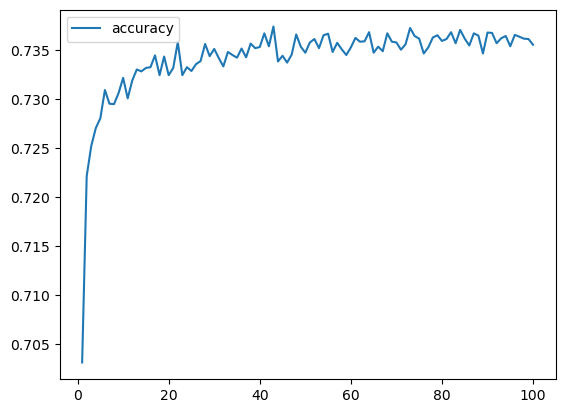

In [150]:
# Plotting accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [151]:
# Export model to HDF5 file
nn.save('Models/AlphabetSoupCharity_Optimization3.h5')